In [1]:
# we are using the movielens latest dataset, available here 
# http://files.grouplens.org/datasets/movielens/ml-latest-small.zip

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('precision',2)

In [3]:
data_path = '../ml-latest'
all_files = [i for i in os.listdir(data_path) if i.endswith('.csv')]
print(all_files)

['genome-tags.csv', 'movies.csv', 'genome-scores.csv', 'tags.csv', 'ratings.csv', 'links.csv']


In [4]:
def get_data(fn):
    df = pd.read_csv(os.path.join(data_path, '{}.csv'.format(fn)))
    print('{} total: {} rows.'.format(fn, len(df)))
    return df

## movies data prep

In [23]:
movies = get_data('movies')
movies.head()

movies total: 45843 rows.


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [24]:
# extract the year from movie title
movies.title = movies.title.apply(lambda x: x.split(' ('))
movies['year'] = movies.title.apply(lambda x: x[1][:4] if len(x)==2 and len(x[1])==5 else 0).astype(int)
movies.title = movies.title.apply(lambda x: x[0])

In [34]:
# split genres and binarize them

movies.genres = movies.genres.apply(lambda x: x.split('|'))

all_genres = list(set([item for sublist in movies.genres.tolist() for item in sublist]))

from sklearn.preprocessing import label_binarize
movies.genres = movies.genres.apply(lambda x: np.sum(label_binarize(x, all_genres), axis=0))

movies = pd.concat([movies, pd.DataFrame(movies.genres.tolist(), columns=all_genres)], axis=1)
movies.head()

,movieId,title,genres,year,Action,Fantasy,Children,Musical,Documentary,Adventure,...,Horror,Film-Noir,Sci-Fi,Comedy,Drama,IMAX,War,Crime,Animation,Western
0,1,Toy Story,"[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1995,0,1,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,2,Jumanji,"[0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",1995,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, ...",1995,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,4,Waiting to Exhale,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, ...",1995,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,5,Father of the Bride Part II,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, ...",1995,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [50]:
movies.to_csv(os.path.join(data_path, 'movies_clean.csv'))

## tags data prep

In [37]:
tags = get_data('tags')
tags.head()

tags total: 753170 rows.


,userId,movieId,tag,timestamp
0,1,318,narrated,1425942391
1,20,4306,Dreamworks,1459855607
2,20,89302,England,1400778834
3,20,89302,espionage,1400778836
4,20,89302,jazz,1400778841


In [38]:
tags['tag_length'] = tags.tag.apply(lambda x: len(str(x)))
tags.sort_values(by='tag_length', ascending=False).head(20)

,userId,movieId,tag,timestamp,tag_length
145051,53729,608,William H. Macy puts forward perhaps his best ...,1140073829,241
675637,241352,72848,den del af filmen hvor han bare går rundt og e...,1419725761,234
675660,241352,103335,den har virkelig mange sjove ting kÃ¸rende for...,1414369222,230
675668,241352,112804,ret interessant billede. Det er utrolig visuel...,1418084574,229
675584,241352,6993,Den fungerer lidt som en kolage som deles ind ...,1415319680,228
675651,241352,78272,"den bliver lidt fantastisk til sidst, når hun ...",1417826247,216
675646,241352,72848,Slutningen er også meget tynd: han får at vide...,1419727213,215
675555,241352,1230,Den har et lidt sjovt sammenfald mellem på en ...,1417998362,215
675665,241352,112556,Nogle af de første scener hvor de to møder hin...,1416823727,210
675597,241352,8930,det bedste ved filmen er ikke de små film han ...,1420674756,210


In [39]:
tags.tag.value_counts().head(20)

sci-fi                8040
atmospheric           5240
action                5065
comedy                4713
based on a book       4473
surreal               4324
twist ending          4073
funny                 3840
BD-R                  3420
classic               3380
visually appealing    3376
dystopia              3334
stylized              3270
dark comedy           3199
quirky                3101
fantasy               3093
psychology            3091
thought-provoking     3051
romance               2790
time travel           2759
Name: tag, dtype: int64

In [40]:
len(tags.tag.unique())

53509

## ratings data prep

In [43]:
ratings = get_data('ratings')
ratings.head()

ratings total: 26024289 rows.


,userId,movieId,rating,timestamp
0,1,110,1.0,1425941529
1,1,147,4.5,1425942435
2,1,858,5.0,1425941523
3,1,1221,5.0,1425941546
4,1,1246,5.0,1425941556


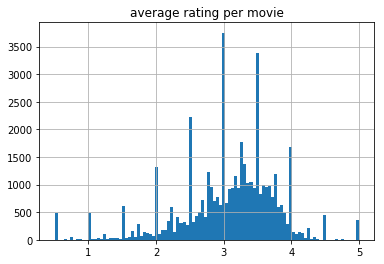

In [46]:
ratings.groupby('movieId').rating.mean().hist(bins=100)
plt.title('average rating per movie')
# -> right skewed!

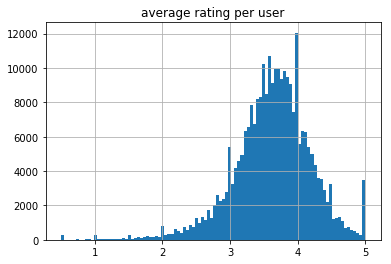

In [47]:
ratings.groupby('userId').rating.mean().hist(bins=100)
plt.title('average rating per user')
# right skewed! some users only rate 4* or 5*

## links data prep

In [48]:
links = get_data('links')
links.head()

links total: 45843 rows.


,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [ ]:
gtags = get_data('genome-tags')
gtags.head()

In [ ]:
gscores = get_data('genome-scores')
gscores.head()